In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Exercice 1 : Binary classification using logistic regression

## Load data and inspection of the data

In [221]:
# We will load the data that is in the file 'donnees_exo1.txt'
data = pd.read_csv('donnees_exo1.txt', sep = ' ')

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      118 non-null    float64
 1   X2      118 non-null    float64
 2   Y       118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [223]:
#description description des données
data.describe(include=('all'))

,X1,X2,Y
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [224]:
#recherche de valeurs manquantes
data.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [225]:
print(data.shape)
print(data.columns)
frame=pd.DataFrame(data)
print(frame['Y'].value_counts(normalize=True))
print(frame['Y'].value_counts(normalize=False))

frame0=pd.DataFrame()
frame1=pd.DataFrame()
test=0

  


(118, 3)
Index(['X1', 'X2', 'Y'], dtype='object')
0    0.508475
1    0.491525
Name: Y, dtype: float64
0    60
1    58
Name: Y, dtype: int64


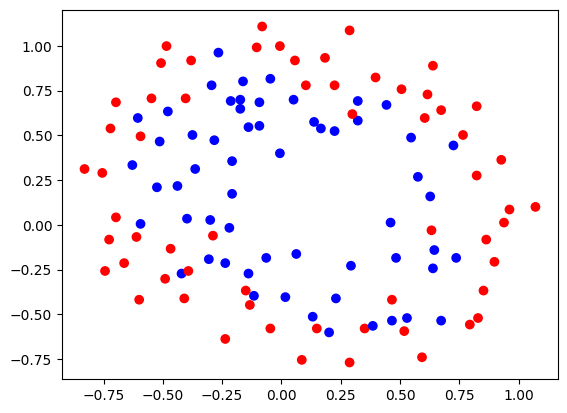

In [226]:
fig, ax = plt.subplots()       
colors = {0:"red", 1:"blue"}
ax.scatter(frame['X1'], frame['X2'], c=frame['Y'].map(colors))
plt.show()


## Train / Validation / Test split

In [227]:
train,test=train_test_split(frame, test_size=0.3, random_state=20)
test, validation=train_test_split(test, test_size=0.5, random_state=20)

validation.shape

(18, 3)

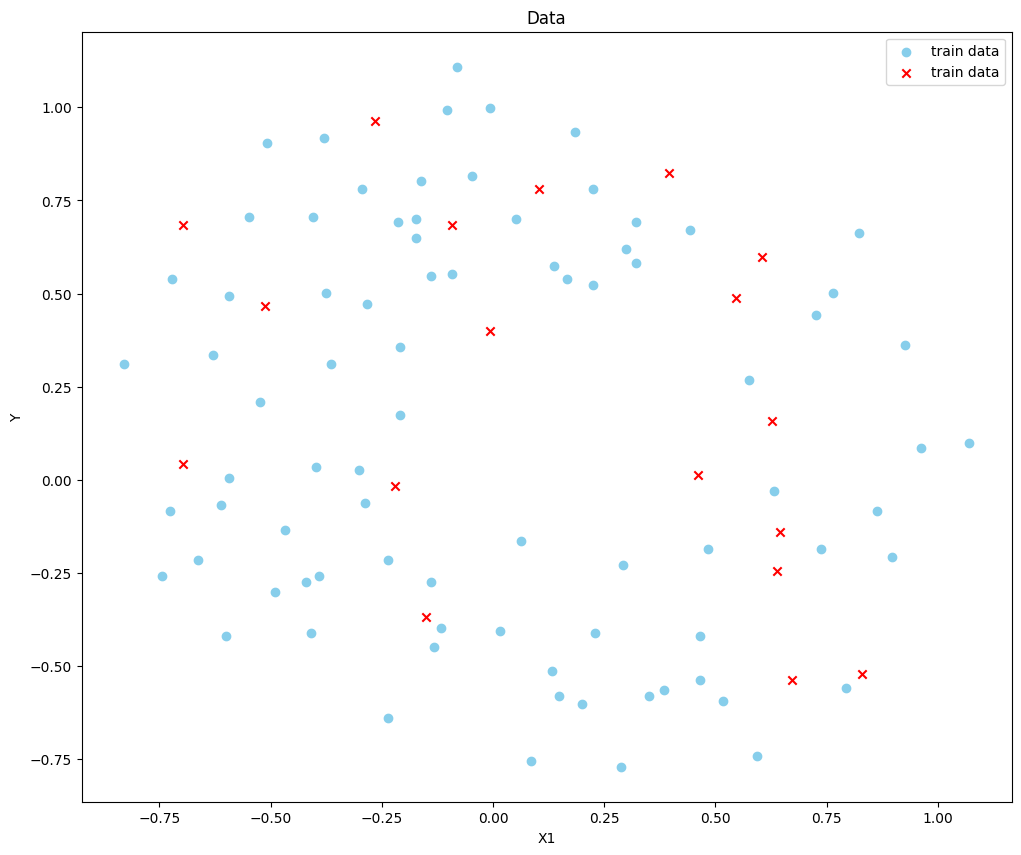

In [228]:
plt.figure(figsize=(12, 10)) # creates a figure with the desired size
plt.scatter(train.X1, train.X2, marker = 'o', color = 'skyblue', label = 'train data') # plots the data in the variable Ozone (by default, index is used for the x-axis and the values for the y-axis).
plt.scatter(validation.X1, validation.X2, marker = 'x', color = 'red', label = 'train data') # plots the data in the variable Ozone (by default, index is used for the x-axis and the values for the y-axis).
# marker is used to define how the points will be depicted (you can try something else). You can also change
# the color. The label is the name that you give to the curve (this name will be used in the legend)
plt.title("Data") # gives a title to the figure
plt.xlabel("X1") # gives a label to the x-axis
plt.ylabel("Y")# gives a label to the y-axis
plt.legend(loc = 'best') # inserts a legend at the best location

## Fitting a logistic regression model

In [229]:
lr_model = LogisticRegression().fit(train.iloc[:,0:2], train.Y)
# Parameters can be added to the 'LogisticRegression' call (we will see this later when we'll need)
# 2 parameters are given to the 'fit' function : 
#  - a dataset containing the features of the examples (here X1 and X2, the 2 first columns of the training set)
#  - a vector containing the labels (Y) of the examples (in the same order), 0 or 1 here

In [230]:
lr_model.intercept_

array([-0.05005029])

In [231]:
lr_model.coef_

array([[-0.05108346,  0.37245342]])

In [232]:
parm0=lr_model.intercept_[0]
parm1=lr_model.coef_[0][0]
parm2=lr_model.coef_[0][1]

X1=train['X1'].iloc[:1]
X2=train['X2'].iloc[:1]


rl_model_output=1/(1+math.exp(-((parm0)+(parm1*X1)+(parm2*X2))))
rl_model_output


0.5544575292202624

In [233]:
lr_model.predict_proba(train.iloc[0:1,0:2])
# actually this command gives you the two probabilities : P(Y = 0 | X1, X2) and P(Y = 1 | X1, X2)
# You should obtain the same probability than the one calculated above

array([[0.44554247, 0.55445753]])

In [234]:
# The final decision of the model can be obtained by the command:
lr_model.predict(train.iloc[0:1,0:2])
train

,X1,X2,Y
36,-0.21371,0.692250,1
86,0.86348,-0.082602,0
110,0.92684,0.363300,0
46,-0.42108,-0.272660,1
76,-0.50749,0.904240,0
...,...,...,...
28,-0.17339,0.699560,1
95,-0.83007,0.312130,0
15,0.32200,0.582600,1
90,0.29320,-0.228800,1


In [235]:
lr_model.score(train.iloc[:,0:2], train.Y)

0.5975609756097561

In [236]:
lr_model.score(validation.iloc[:,0:2], validation.Y)

0.3888888888888889

## Visualization of the decision boundary

In [237]:
def draw_boundary(model, data, deg, x_min, x_max, y_min, y_max):
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    if(deg>1):
        poly = PolynomialFeatures(degree = deg)
        zz2 = poly.fit_transform(zz)
        zz2 = pd.DataFrame(zz2)
    else:
        zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


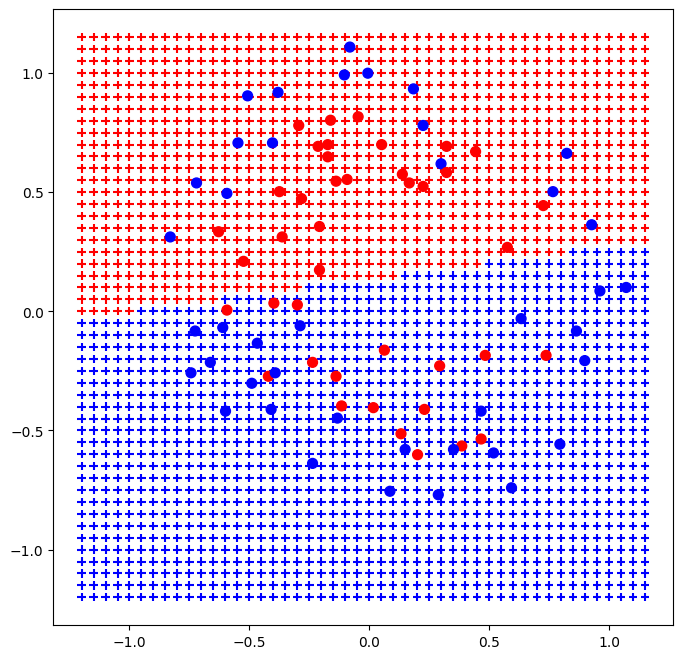

In [238]:
draw_boundary(lr_model, train, 1, -1.2, 1.2, -1.2, 1.2)

In [239]:
poly = PolynomialFeatures(degree = 2) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
X_train2 = poly.fit_transform(train.iloc[:,0:2]) # Here we use the 'poly' created above to add polynomial
# features of degree 2 to the training set
# It creates 4 new columns : 
# - one with 'ones' everywhere
# - one with X1^2
# - one with X2^2
# - one with X1*X2


In [240]:
print(X_train2.shape)
#X_train2

(82, 6)


In [241]:
lr_model2 = LogisticRegression().fit(X_train2, train.Y)


In [242]:
lr_model2.score(X_train2, train.Y)

0.8048780487804879

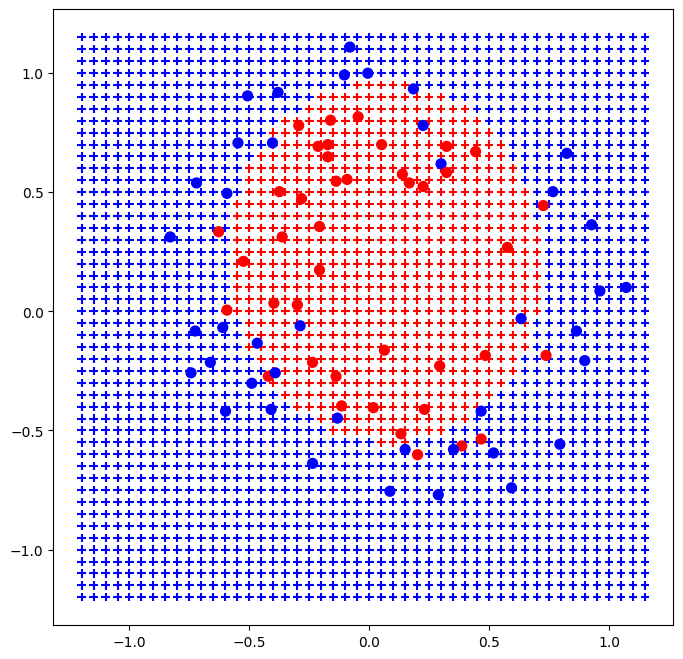

In [243]:
draw_boundary(lr_model2, train, 2, -1.2, 1.2, -1.2, 1.2)

In [244]:
poly = PolynomialFeatures(degree = 2) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
validation_2 = poly.fit_transform(validation.iloc[:,0:2]) # Here we use the 'poly' created above to add polynomial

lr_model2.score(validation_2, validation.Y)

0.6111111111111112

In [246]:
poly = PolynomialFeatures(degree = 3) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
X_train3 = poly.fit_transform(train.iloc[:,0:2]) # Here we use the 'poly' created above to add polynomial

lr_model3 = LogisticRegression().fit(X_train3, train.Y)

#poly = PolynomialFeatures(degree = 3) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
validation_3 = poly.fit_transform(validation.iloc[:,0:2]) # Here we use the 'poly' created above to add polynomial

lr_model3.score(validation_3, validation.Y)

0.5555555555555556

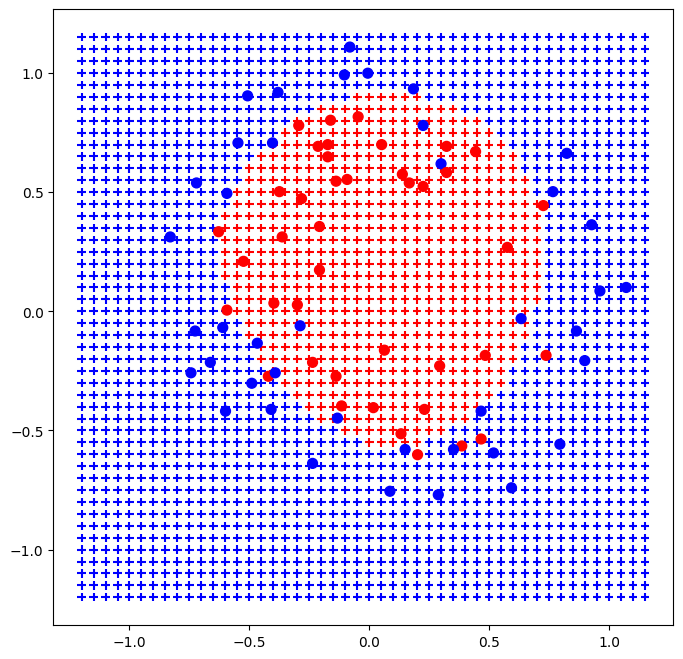

In [ ]:
draw_boundary(lr_model3, train, 3, -1.2, 1.2, -1.2, 1.2)

#  Exercice 2 : Multi-class classification

In [ ]:
# Load the data. 
segment = pd.read_csv("segment.txt", sep = ' ')
segment

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.777780,-25.222221,75.222220,0.318996,-2.040554,6
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.000000,-2.333333,2.555556,1.000000,-2.123254,3
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.222220,-16.777779,139.777790,0.199347,-2.299918,2
3,32,173,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.888890,-15.777778,52.888890,0.266914,-1.998857,6
4,61,197,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.888890,-19.777779,61.555557,0.302925,-2.022274,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,30,102,9,0.000000,0.0,1.222222,0.118518,1.333333,0.800000,20.259260,20.333334,25.000000,15.444445,0.222222,14.222222,-14.444445,25.000000,0.381059,-1.555097,1
2306,143,24,9,0.000000,0.0,1.277777,0.907406,0.888888,1.140749,127.629630,117.666664,141.666670,123.555560,-29.888890,42.111110,-12.222222,141.666670,0.169397,-2.349252,2
2307,80,72,9,0.000000,0.0,1.222223,1.003697,1.444444,1.167461,59.000000,51.333332,74.444440,51.222220,-23.000000,46.333332,-23.333334,74.444440,0.314606,-2.090221,4
2308,98,133,9,0.000000,0.0,0.555555,0.172133,0.388889,0.327731,0.962963,0.000000,2.777778,0.111111,-2.888889,5.444445,-2.555556,2.777778,1.000000,-2.123254,3


In [ ]:
segment.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
count,2310.000000,2310.000000,2310.0,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,124.913853,123.417316,9.0,0.014334,0.004714,1.893939,5.709320,2.424723,8.243692e+00,37.051595,32.821308,44.187879,34.145599,-12.690861,21.408850,-8.717989,45.137470,0.426893,-1.362897,4.000000
std,72.956532,57.483851,0.0,0.040154,0.024234,2.698908,44.846457,3.610084,5.881152e+01,38.176410,35.036774,43.527461,36.364773,11.583562,19.571819,11.551628,42.921764,0.228309,1.545335,2.000433
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175,1.000000
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.355555,0.777780,4.216373e-01,7.296296,7.000000,9.555555,6.027778,-18.555555,4.138889,-16.777779,11.555555,0.284235,-2.188057,2.000000
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.222224,0.833333,1.444444,9.629633e-01,21.592592,19.555555,27.666667,20.333334,-10.888889,19.666666,-10.888889,28.666666,0.374803,-2.051200,4.000000
75%,189.000000,172.000000,9.0,0.000000,0.000000,2.166667,1.806367,2.555556,2.183269e+00,53.212964,47.333332,64.888890,46.500001,-4.222222,35.777780,-3.222222,64.888890,0.540123,-1.562308,6.000000
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480,7.000000


In [ ]:
print(segment.shape)
print(segment.columns)
segment_frame=pd.DataFrame(segment)
print(segment_frame['y'].value_counts(normalize=True))
print(segment_frame['y'].value_counts(normalize=False))

(2310, 20)
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'y'],
      dtype='object')
6    0.142857
3    0.142857
2    0.142857
7    0.142857
1    0.142857
4    0.142857
5    0.142857
Name: y, dtype: float64
6    330
3    330
2    330
7    330
1    330
4    330
5    330
Name: y, dtype: int64


In [ ]:
# It is adviced to "standardize" the features before applying a logistic regression model. Santardize means
# transforming each feature so that the mean of each feature is 0 and the standard deviation 1.
# This can be done by the following commands
X_segment = segment.iloc[:,0:19] # X_segment contains the features
y_segment = segment.y # y_segment contains the class
scaler = preprocessing.StandardScaler().fit(X_segment) # Standard Scaler is the command to standardize
X_segment = scaler.transform(X_segment)
X_segment = pd.DataFrame(X_segment)
# Now the features are standardized inside the table X_segment
data_segment = X_segment
data_segment['y'] = y_segment
# data_segment contains the features (standardized) and the class (column 'y')


#Question_dev: pourquoi pas standardisé pour deux classes
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2310 non-null   float64
 1   1       2310 non-null   float64
 2   2       2310 non-null   float64
 3   3       2310 non-null   float64
 4   4       2310 non-null   float64
 5   5       2310 non-null   float64
 6   6       2310 non-null   float64
 7   7       2310 non-null   float64
 8   8       2310 non-null   float64
 9   9       2310 non-null   float64
 10  10      2310 non-null   float64
 11  11      2310 non-null   float64
 12  12      2310 non-null   float64
 13  13      2310 non-null   float64
 14  14      2310 non-null   float64
 15  15      2310 non-null   float64
 16  16      2310 non-null   float64
 17  17      2310 non-null   float64
 18  18      2310 non-null   float64
 19  y       2310 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 361.1 KB


In [ ]:
np.mean(data_segment[1])

9.996813381906172e-17

In [ ]:
train_data,test=train_test_split(data_segment, test_size=0.3, random_state=20)
test, validation=train_test_split(test, test_size=0.5, random_state=20)

train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,y
1063,-0.766565,0.271138,0.0,-0.357047,-0.194552,0.348140,-0.087786,-0.086890,-0.111819,-0.497208,-0.480208,-0.497089,-0.508265,0.558554,-0.407020,0.129513,-0.495161,-0.176471,-0.220023,3
1620,-1.383505,-1.016459,0.0,-0.357047,-0.194552,-0.248939,-0.088016,-0.025321,-0.100140,-0.425401,-0.362846,-0.400066,-0.511321,0.913539,-0.179887,-0.611283,-0.427840,-0.032750,-0.196088,1
231,-0.588339,-0.250861,0.0,2.410668,-0.194552,-0.434239,-0.121966,-0.302382,-0.126596,-0.504971,-0.388222,-0.532834,-0.578556,1.470004,-0.600084,-0.457351,-0.562481,-0.222857,0.055880,1
536,1.262479,-0.877259,0.0,-0.357047,-0.194552,-0.372472,-0.109824,-0.194636,-0.125525,-0.843629,-0.886219,-0.793262,-0.853607,0.299510,-0.355915,0.302687,-0.826585,1.733173,-0.585941,3
1097,1.166511,1.889334,0.0,-0.357047,-0.194552,-0.022461,-0.100428,-0.256206,-0.110909,-0.739800,-0.749825,-0.849433,-0.590780,0.510582,-1.338266,1.755418,-0.756675,0.282552,2.306934,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.906025,-0.285661,0.0,-0.357047,-0.194552,0.059895,-0.093294,2.191174,-0.088992,-0.205128,-0.169356,-0.190702,-0.254607,0.491394,-0.071999,-0.370765,-0.215522,-0.505304,-0.332855,4
1607,-0.286724,-0.198661,0.0,-0.357047,-0.194552,-0.475417,-0.121739,-0.379344,-0.128087,0.578927,0.553850,0.669733,0.488031,-0.698289,1.080701,-1.130803,0.657055,-0.583600,-0.463149,4
1814,-1.657700,2.167733,0.0,-0.357047,-0.194552,0.533440,-0.086888,0.220957,-0.118789,-0.458394,-0.492896,-0.632409,-0.211821,0.059654,-1.537007,2.544318,-0.435608,-0.020776,2.309381,7
1428,-0.231885,0.253738,0.0,-0.357047,-0.194552,-0.598950,-0.125931,-0.533267,-0.138123,-0.887295,-0.895735,-0.862199,-0.899448,0.644901,-0.560335,0.302687,-0.896495,1.632832,-0.469212,5


In [248]:
mc_model = LogisticRegression(multi_class='multinomial').fit(train_data.iloc[:,0:19], train_data.y)
#lr_model = LogisticRegression().fit(train.iloc[:,0:2], train.Y)

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
mc_model = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(train_data.iloc[:,0:19], train_data.y)
# Now it should converge

In [ ]:
mc_model.intercept_
test=pd.DataFrame(mc_model.coef_)
test


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.348893,-1.573885,0.0,0.054442,-0.020863,-0.671049,-0.202679,-0.220425,-0.155646,-0.605666,-0.185978,-0.471037,-1.164515,4.300767,0.401460,-4.992847,-0.542134,0.532778,1.573094
1,0.423020,-0.161274,0.0,-0.066243,-0.084223,-0.220357,-0.015026,-0.179400,-0.018573,1.546166,1.595463,1.421375,1.631041,-0.809899,0.435595,0.074113,1.441449,-0.432976,-0.073164
2,-0.552232,-2.582671,0.0,-0.139880,0.110527,0.425922,0.523027,0.207886,0.156792,-1.251822,-1.749077,-1.138075,-0.895116,-3.494243,-0.267851,3.957720,-1.198952,0.879044,-1.414079
3,0.053041,-0.772200,0.0,0.090632,-0.221985,0.526508,-0.134333,-0.194907,-0.290570,0.435798,0.577747,0.374828,0.367222,0.933694,-0.049343,-0.852675,0.315762,-0.269964,-0.667651
4,0.458923,-1.900393,0.0,-0.050849,0.128870,0.018553,0.343301,-0.692565,0.675106,-0.939424,-1.111914,-0.799461,-0.930438,-0.801317,0.163299,0.526857,-0.756849,-0.006760,-0.053364
5,0.278102,5.315355,0.0,0.025811,-0.408179,0.105676,-0.325732,0.399231,0.007647,0.705904,0.796059,0.668530,0.656015,0.244090,0.329641,-0.803273,0.654807,-0.965586,-0.967823
6,-0.311961,1.675067,0.0,0.086087,0.495851,-0.185253,-0.188557,0.680181,-0.374756,0.109044,0.077700,-0.056161,0.335791,-0.373092,-1.012801,2.090104,0.085917,0.263463,1.602986


In [ ]:

print(pd.DataFrame(mc_model.predict_proba(data_segment.iloc[:,0:19])))

                 0             1             2         3             4  \
0     5.152671e-05  8.269796e-04  1.361009e-09  0.025537  1.995862e-05   
1     1.950034e-02  9.176714e-10  7.402721e-01  0.003360  2.358812e-01   
2     2.260395e-12  9.991724e-01  1.725893e-11  0.000827  3.214637e-09   
3     8.050303e-04  3.418028e-05  4.609554e-06  0.072780  1.036059e-04   
4     5.798879e-05  2.644740e-05  2.657524e-08  0.009482  1.023943e-05   
...            ...           ...           ...       ...           ...   
2305  9.717880e-01  2.417733e-08  2.348818e-05  0.023555  4.612536e-03   
2306  1.016751e-12  9.988478e-01  4.213298e-11  0.001152  1.794119e-09   
2307  5.597772e-03  9.147014e-03  4.063909e-05  0.978359  6.431309e-03   
2308  1.917870e-02  8.909359e-10  7.740816e-01  0.003539  2.020695e-01   
2309  8.162194e-01  5.525057e-09  3.184119e-02  0.018685  1.281636e-01   

                 5             6  
0     9.735623e-01  2.305163e-06  
1     1.465755e-06  9.844615e-04  
2     

In [ ]:
train_data.columns = train_data.columns.astype(str)
validation.columns = validation.columns.astype(str)
mc_model.score(train_data.iloc[:,0:19], train_data.y)

0.943104514533086

In [ ]:
result=pd.DataFrame()
models=[]
score_train = []
score_valid = []
score_test= []
for i in range (1,5):
    poly = PolynomialFeatures(degree = i) 
    train_poly = pd.DataFrame(poly.fit_transform(train_data.iloc[:,0:19]))
    valid_poly = pd.DataFrame(poly.fit_transform(validation.iloc[:,0:19]))
    test_poly = pd.DataFrame(poly.fit_transform(test.iloc[:,0:19]))
    mc_model = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(train_poly, train_data.y)
    score_train.append(mc_model.score(train_poly, train_data.y))
    score_valid.append(mc_model.score(valid_poly, validation.y))
    score_test.append(mc_model.score(test_poly, test.y))
    models.append(mc_model)

result['score_train'] = score_train
result['score_valid'] = score_valid
result['score_test'] = score_test
result['models'] = models
best_index = result['score_valid'].idxmax()
rendu= [result['models'][best_index],best_index]

rendu

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[LogisticRegression(max_iter=1000, multi_class='multinomial'), 2]

In [ ]:
result

,score_train,score_valid,score_test,models
0,0.943105,0.939481,0.924855,"LogisticRegression(max_iter=1000, multi_class=..."
1,0.981447,0.979827,0.959538,"LogisticRegression(max_iter=1000, multi_class=..."
2,0.991960,0.985591,0.962428,"LogisticRegression(max_iter=1000, multi_class=..."
3,0.996908,0.968300,0.971098,"LogisticRegression(max_iter=1000, multi_class=..."


In [ ]:
err_gen=1-result['score_test'][best_index]

In [ ]:
err_gen

0.037572254335260125

In [ ]:
def lr_model(data_train,data_valid,data_test,deb,fin):   
    result=pd.DataFrame()
    models=[]
    score_train = []
    score_valid = []
    score_test= []
    for i in range (1,4):
        poly = PolynomialFeatures(degree = i) 
        train_poly = pd.DataFrame(poly.fit_transform(data_train.iloc[:,1:]))
        valid_poly = pd.DataFrame(poly.fit_transform(data_valid.iloc[:,1:]))
        test_poly = pd.DataFrame(poly.fit_transform(data_test.iloc[:,1:]))
        mc_model = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(train_poly.iloc[:,0:], data_train.label)
        score_train.append(mc_model.score(train_poly.iloc[:,0:], data_train.label))
        score_valid.append(mc_model.score(valid_poly.iloc[:,0:], data_valid.label))
        score_test.append(mc_model.score(test_poly.iloc[:,0:], data_test.label))
        models.append(mc_model)

    result['score_train'] = score_train
    result['score_valid'] = score_valid
    result['score_test'] = score_test
    result['models'] = models
    best_index = result['score_valid'].idxmax()
    model=result['models'][best_index]
    return(result,model)
